# Part 1 : Data Loader

In [2]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
import os, sys
import tarfile
import matplotlib.pyplot as plt

from IPython.display import display, Image
from scipy import ndimage
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
from tqdm import tqdm

# Config the matplotlib backend as plotting inline in Ipython
%matplotlib inline

In [3]:
url = 'https://commondatastorage.googleapis.com/books1000/'

data_root = './data'
if not os.path.exists(data_root):
    os.mkdir(data_root)
    
def dataset_downloader(filename):
    """Download a file if not present."""
    dest_dir = os.path.join(data_root, filename)
    if not os.path.exists(dest_dir):
        print('Attempting to download : ', filename)
        filename, _ = urlretrieve(url + filename, dest_dir)
        print(filename, 'download complete!')
    else:
        print(dest_dir, ' already exists.')
    
    return dest_dir

train_filename = dataset_downloader('notMNIST_large.tar.gz')
test_filename = dataset_downloader('notMNIST_small.tar.gz')

./data/notMNIST_large.tar.gz  already exists.
./data/notMNIST_small.tar.gz  already exists.


In [4]:
num_classes = 10
np.random.seed(1000)

def data_extract(filename):
    root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
    
    if os.path.isdir(root):
        print('{} already present - Skipping extraction of {}.'.format(root, filename))
    else:
        print('Extracting data for {}.'.format(root))
        tar = tarfile.open(filename)
        sys.stdout.flush()
        tar.extractall(data_root)
        tar.close()
    data_folders = [
        os.path.join(root, d) for d in sorted(os.listdir(root))
        if os.path.isdir(os.path.join(root, d))]
    
    if len(data_folders) != num_classes:
        raise Exception('Expected {} folders, but found {} instead.'.format(num_classes, len(data_folders)))
    
    print(data_folders)
    return data_folders

train_folders = data_extract(train_filename)
test_folders = data_extract(test_filename)

./data/notMNIST_large already present - Skipping extraction of ./data/notMNIST_large.tar.gz.
['./data/notMNIST_large/A', './data/notMNIST_large/B', './data/notMNIST_large/C', './data/notMNIST_large/D', './data/notMNIST_large/E', './data/notMNIST_large/F', './data/notMNIST_large/G', './data/notMNIST_large/H', './data/notMNIST_large/I', './data/notMNIST_large/J']
./data/notMNIST_small already present - Skipping extraction of ./data/notMNIST_small.tar.gz.
['./data/notMNIST_small/A', './data/notMNIST_small/B', './data/notMNIST_small/C', './data/notMNIST_small/D', './data/notMNIST_small/E', './data/notMNIST_small/F', './data/notMNIST_small/G', './data/notMNIST_small/H', './data/notMNIST_small/I', './data/notMNIST_small/J']


In [5]:
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def load_letter(folder):
    """Load the data for a single letter label."""
    image_files = os.listdir(folder)
    dataset = np.ndarray(shape=(len(image_files), image_size, image_size), dtype=np.float32)
    
    num_images = 0
    for image in image_files:
        image_file = os.path.join(folder, image)
        try:
            image_data = (ndimage.imread(image_file).astype(float) - pixel_depth / 2) / pixel_depth
            if image_data.shape != (image_size, image_size):
                raise Exception('Unexpected image shape: {str(image_data.shape)}'.format(str(image_data.shape)))
            dataset[num_images, :, :] = image_data
            num_images = num_images + 1
        except IOError as e:
            print('{} - skip'.format(e))
    
    dataset = dataset[0:num_images, :, :]
    print('Full dataset tensor:', dataset.shape)
    
    return dataset
        
def make_pickle(data_folders):
    dataset_names = []
    for folder in data_folders:
        set_filename = folder + '.pickle'
        dataset_names.append(set_filename)
        if os.path.exists(set_filename):
            print('{} already present - Skipping pickling.'.format(set_filename))
            continue
        print('Pickling {}'.format(set_filename))
        dataset = load_letter(folder)
        with open(set_filename, 'wb') as f:
            pickle.dump(dataset, f)

    return dataset_names

train_datasets = make_pickle(train_folders)
test_datasets = make_pickle(test_folders)

./data/notMNIST_large/A.pickle already present - Skipping pickling.
./data/notMNIST_large/B.pickle already present - Skipping pickling.
./data/notMNIST_large/C.pickle already present - Skipping pickling.
./data/notMNIST_large/D.pickle already present - Skipping pickling.
./data/notMNIST_large/E.pickle already present - Skipping pickling.
./data/notMNIST_large/F.pickle already present - Skipping pickling.
./data/notMNIST_large/G.pickle already present - Skipping pickling.
./data/notMNIST_large/H.pickle already present - Skipping pickling.
./data/notMNIST_large/I.pickle already present - Skipping pickling.
./data/notMNIST_large/J.pickle already present - Skipping pickling.
./data/notMNIST_small/A.pickle already present - Skipping pickling.
./data/notMNIST_small/B.pickle already present - Skipping pickling.
./data/notMNIST_small/C.pickle already present - Skipping pickling.
./data/notMNIST_small/D.pickle already present - Skipping pickling.
./data/notMNIST_small/E.pickle already present -

100%|██████████| 10/10 [00:21<00:00,  2.17s/it]


(10, 28, 28)


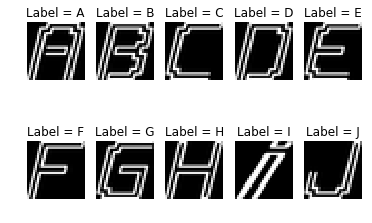

In [6]:
images = []
for i in tqdm(range(len(train_datasets))):
    set_filename = train_datasets[i]
    with open(set_filename, 'rb') as f:
        dataset = pickle.load(f)
    images.append(dataset[1])
print(np.shape(images))

Row = 2
Column = 5
for i, image in enumerate(images):
    plt.subplot(Row, Column, i+1)
    plt.title('Label = {}'.format(os.path.basename(train_datasets[i])[0]))
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.show()

In [10]:
print("==== For training ====")
for i in range(len(train_datasets)):
    set_filename = train_datasets[i]
    with open(set_filename, 'rb') as f:
        dataset = pickle.load(f)
    print("The number of {} train images is {}".format(os.path.basename(set_filename)[0], len(dataset)))

print("\n==== For testing =====")
for i in range(len(test_datasets)):
    set_filename = test_datasets[i]
    with open(set_filename, 'rb') as f:
        dataset = pickle.load(f)
    print("The number of {} test images is {}".format(os.path.basename(set_filename)[0], len(dataset)))

==== For training ====
The number of A train images is 52909
The number of B train images is 52911
The number of C train images is 52912
The number of D train images is 52911
The number of E train images is 52912
The number of F train images is 52912
The number of G train images is 52912
The number of H train images is 52912
The number of I train images is 52912
The number of J train images is 52911

==== For testing =====
The number of A test images is 1872
The number of B test images is 1873
The number of C test images is 1873
The number of D test images is 1873
The number of E test images is 1873
The number of F test images is 1872
The number of G test images is 1872
The number of H test images is 1872
The number of I test images is 1872
The number of J test images is 1872


In [11]:
def merge_datasets(pickle_files, dataset_size):
    num_classes = len(pickle_files)
    dataset = np.ndarray((dataset_size, image_size, image_size), dtype=np.float32)
    labels = np.ndarray(dataset_size, dtype=np.int32)
    tsize_per_class = dataset_size // num_classes

    start_t = 0
    end_t = tsize_per_class
    for label, pickle_file in enumerate(pickle_files):       
        with open(pickle_file, 'rb') as f:
            letter_set = pickle.load(f)
            np.random.shuffle(letter_set)

            letter = letter_set[0:tsize_per_class, :, :]
            dataset[start_t:end_t, :, :] = letter
            labels[start_t:end_t] = label
            start_t += tsize_per_class
            end_t += tsize_per_class

    return dataset, labels


train_size = 200000
test_size = 10000

train_dataset, train_labels = merge_datasets(train_datasets, train_size)
test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

Training: (200000, 28, 28) (200000,)
Testing: (10000, 28, 28) (10000,)


In [12]:
def randomize(dataset, labels):
    permutation = np.random.permutation(labels.shape[0])
    shuffled_dataset = dataset[permutation,:,:]
    shuffled_labels = labels[permutation]
    return shuffled_dataset, shuffled_labels

train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)

==== For training ====


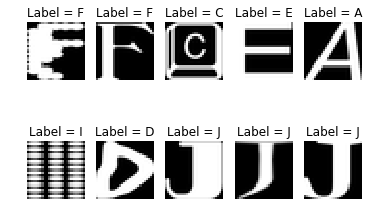

==== For testing ====


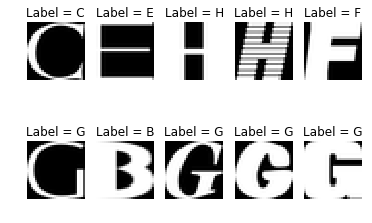

In [13]:
Row = 2
Column = 5
ListOfLabel = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

print("==== For training ====")
images = train_dataset[0:10]
labels = train_labels[0:10]
for i, image in enumerate(images):
    plt.subplot(Row, Column, i+1)
    plt.title('Label = {}'.format(ListOfLabel[labels[i]]))
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.show()

print("==== For testing ====")
images = test_dataset[0:10]
labels = test_labels[0:10]
for i, image in enumerate(images):
    plt.subplot(Row, Column, i+1)
    plt.title('Label = {}'.format(ListOfLabel[labels[i]]))
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.show()

In [14]:
pickle_file = os.path.join(data_root, 'notMNIST.pickle')

f = open(pickle_file, 'wb')
save = {
    'train_dataset': train_dataset[:50000,],
    'train_labels': train_labels[:50000,],
    'test_dataset': test_dataset[:10000,],
    'test_labels': test_labels[:10000,],
}
pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
f.close()